![image.png](img/lab5.png)

Задание 6.21. Установите влияние объема продаж товара в зависимости от типа используемой рекламы для заданного значения альфа. Установите меру влияния каждого типа рекламы. Определите параметры и постройте плотности вероятностей распределения числа продаж для каждого типа рекламы.

F-статистика: 2.7740, p-значение: 0.0731
Не отвергаем H0: тип рекламы не влияет на объем продаж.
Критическое значение F (x_alpha) при alpha = 0.05: 3.1968
Поскольку F = 2.7740 > F_crit = 3.1968, отвергаем H0.
Мера влияния (эта-квадрат): 0.3286

Параметры распределения:
Тип A: среднее = 6.1788, стандартное отклонение = 0.9698
Тип B: среднее = 8.1483, стандартное отклонение = 1.4149
Тип C: среднее = 6.8564, стандартное отклонение = 1.5320
Тип D: среднее = 7.3573, стандартное отклонение = 0.5431


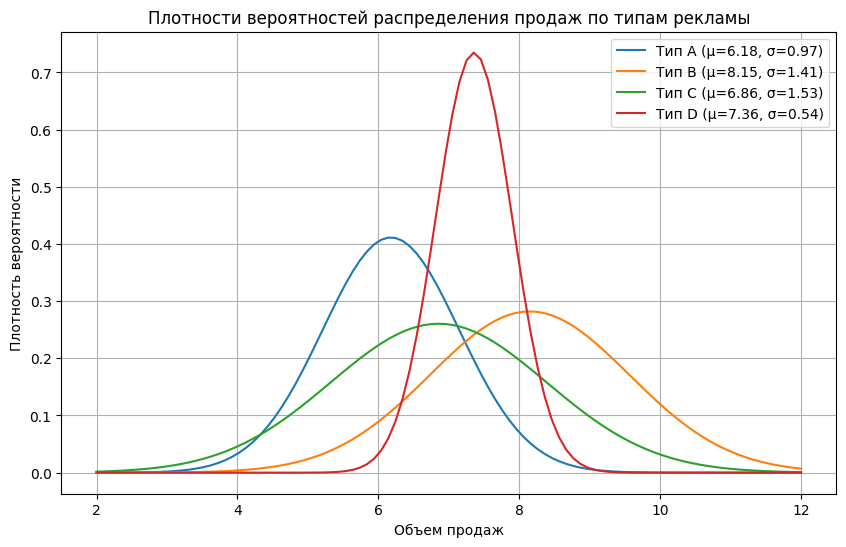

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, norm, f

# Данные
data_A = [6.383, 7.135, 4.706, 7.203, 6.194, 5.452]
data_B = [8.659, 6.424, 6.567, 9.984, 8.156, 9.1]
data_C = [7.248, 7.768, 6.478, 8.373, 4.415]
data_D = [7.238, 6.682, 7.532, 7.977]

# ANOVA
f_stat, p_value = f_oneway(data_A, data_B, data_C, data_D)
alpha = 0.05
print(f"F-статистика: {f_stat:.4f}, p-значение: {p_value:.4f}")
if p_value < alpha:
    print("Отвергаем H0: тип рекламы влияет на объем продаж.")
else:
    print("Не отвергаем H0: тип рекламы не влияет на объем продаж.")

# Вычисление критического значения F (x_alpha)
df_between = 4 - 1  # Степени свободы между группами
df_within = (len(data_A) + len(data_B) + len(data_C) + len(data_D)) - 4  # Степени свободы внутри групп
F_crit = f.ppf(1 - alpha, df_between, df_within)
print(f"Критическое значение F (x_alpha) при alpha = {alpha}: {F_crit:.4f}")
print(f"Поскольку F = {f_stat:.4f} > F_crit = {F_crit:.4f}, отвергаем H0.")

# Мера влияния (эта-квадрат)
means = [np.mean(data_A), np.mean(data_B), np.mean(data_C), np.mean(data_D)]
n_groups = len(means)
n_total = len(data_A) + len(data_B) + len(data_C) + len(data_D)
overall_mean = (sum(data_A) + sum(data_B) + sum(data_C) + sum(data_D)) / n_total
ssb = len(data_A) * (means[0] - overall_mean)**2 + len(data_B) * (means[1] - overall_mean)**2 + \
      len(data_C) * (means[2] - overall_mean)**2 + len(data_D) * (means[3] - overall_mean)**2
sst = sum((x - overall_mean)**2 for x in data_A) + sum((x - overall_mean)**2 for x in data_B) + \
      sum((x - overall_mean)**2 for x in data_C) + sum((x - overall_mean)**2 for x in data_D)
eta_squared = ssb / sst
print(f"Мера влияния (эта-квадрат): {eta_squared:.4f}")

# Параметры нормального распределения
distributions = {
    'A': {'mean': np.mean(data_A), 'std': np.std(data_A, ddof=1)},
    'B': {'mean': np.mean(data_B), 'std': np.std(data_B, ddof=1)},
    'C': {'mean': np.mean(data_C), 'std': np.std(data_C, ddof=1)},
    'D': {'mean': np.mean(data_D), 'std': np.std(data_D, ddof=1)}
}

print("\nПараметры распределения:")
for ad_type, params in distributions.items():
    print(f"Тип {ad_type}: среднее = {params['mean']:.4f}, стандартное отклонение = {params['std']:.4f}")

# Построение плотностей вероятностей
x = np.linspace(2, 12, 100)
plt.figure(figsize=(10, 6))
for ad_type, params in distributions.items():
    pdf = norm.pdf(x, params['mean'], params['std'])
    plt.plot(x, pdf, label=f'Тип {ad_type} (μ={params["mean"]:.2f}, σ={params["std"]:.2f})')

plt.xlabel('Объем продаж')
plt.ylabel('Плотность вероятности')
plt.title('Плотности вероятностей распределения продаж по типам рекламы')
plt.legend()
plt.grid(True)
plt.savefig('sales_distribution.png')